## [Solving real world data science tasks with Python Pandas!](https://www.youtube.com/watch?v=eMOA1pPVUc4&t=392s)

In [1]:
import matplotlib
print(matplotlib.__version__)

3.3.2


In [2]:
print(matplotlib.get_backend())

module://ipykernel.pylab.backend_inline


In [3]:
#'nbAgg'
matplotlib.use('nbAgg')
print(matplotlib.get_backend())

nbAgg


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
os.getcwd()

'D:\\Extra Knowledge\\Data Science\\python-data-science-code'

In [6]:
#os.chdir("Music")

In [7]:
#os.getcwd()

In [8]:
path='./data/Sales_Data'
files=[file for file in os.listdir(path)]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019 - Copy.csv
Sales_January_2019 - Copy.csv
Sales_July_2019 - Copy.csv
Sales_June_2019 - Copy.csv
Sales_March_2019 - Copy.csv
Sales_May_2019 - Copy.csv
Sales_November_2019 - Copy.csv
Sales_October_2019 - Copy.csv
Sales_September_2019 - Copy.csv


In [9]:
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019 - Copy.csv', 'Sales_January_2019 - Copy.csv', 'Sales_July_2019 - Copy.csv', 'Sales_June_2019 - Copy.csv', 'Sales_March_2019 - Copy.csv', 'Sales_May_2019 - Copy.csv', 'Sales_November_2019 - Copy.csv', 'Sales_October_2019 - Copy.csv', 'Sales_September_2019 - Copy.csv']


In [10]:
dataframe=[pd.read_csv('./data/Sales_Data'+'/'+ f) for f in files]

In [11]:
#dataframe

In [12]:
all_months_data=pd.concat(dataframe)

In [13]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
#create a csv file in current directory from our concat
#all_months_data.to_csv("all_data_copy.csv", index=False)

In [15]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [16]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
all_months_data.shape

(186850, 6)

In [18]:
nan_df=all_months_data[all_months_data.isnull()]
display(nan_df.tail())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN
11685,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df=all_months_data.dropna()

In [20]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [21]:
df.shape

(186305, 6)

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [23]:
df.columns=df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [24]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [25]:
df.drop(df[df.order_date.str[6:8]=='Da'].index, inplace=True)
df.shape

C:\Users\HP-NPC\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(182735, 6)

In [26]:
#Create time series in column 'date'
df['order_date']=pd.to_datetime(df.order_date)
#df['date']=pd.to_datetime(df.order_date, format='%m/%d/%y %H:%M' or '%m/%d/%Y %H:%M')

<ipython-input-26-a86d329f5b08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date']=pd.to_datetime(df.order_date)


In [27]:
df['price_each']=df.price_each.astype('float')

<ipython-input-27-a9164ef5d111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_each']=df.price_each.astype('float')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182735 non-null  object        
 1   product           182735 non-null  object        
 2   quantity_ordered  182735 non-null  object        
 3   price_each        182735 non-null  float64       
 4   order_date        182735 non-null  datetime64[ns]
 5   purchase_address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.8+ MB


In [29]:
df.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

In [30]:
df.quantity_ordered=df.quantity_ordered.astype('float')

C:\Users\HP-NPC\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df['sales']=df.quantity_ordered*df.price_each

<ipython-input-31-eaa8fdff8990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales']=df.quantity_ordered*df.price_each


In [32]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


# Data Exploration!

### Question 1: What was the best month for sales? How much was earned that month?

In [33]:
monthly_sales=df.groupby(df.order_date.dt.strftime('%b'))['quantity_ordered', 
                                           'sales'].sum()
monthly_sales=monthly_sales.sort_values('sales')
monthly_sales


<ipython-input-33-16e2af9cb089>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales=df.groupby(df.order_date.dt.strftime('%b'))['quantity_ordered',


,quantity_ordered,sales
order_date,,
Jan,10670.0,1.786511e+06
Sep,12827.0,2.050361e+06
Feb,13162.0,2.158127e+06
Aug,13185.0,2.191698e+06
Jun,14964.0,2.524465e+06
Jul,15781.0,2.587445e+06
Mar,16697.0,2.755969e+06
May,18344.0,3.101881e+06
Nov,19479.0,3.149785e+06


<IPython.core.display.Javascript object>


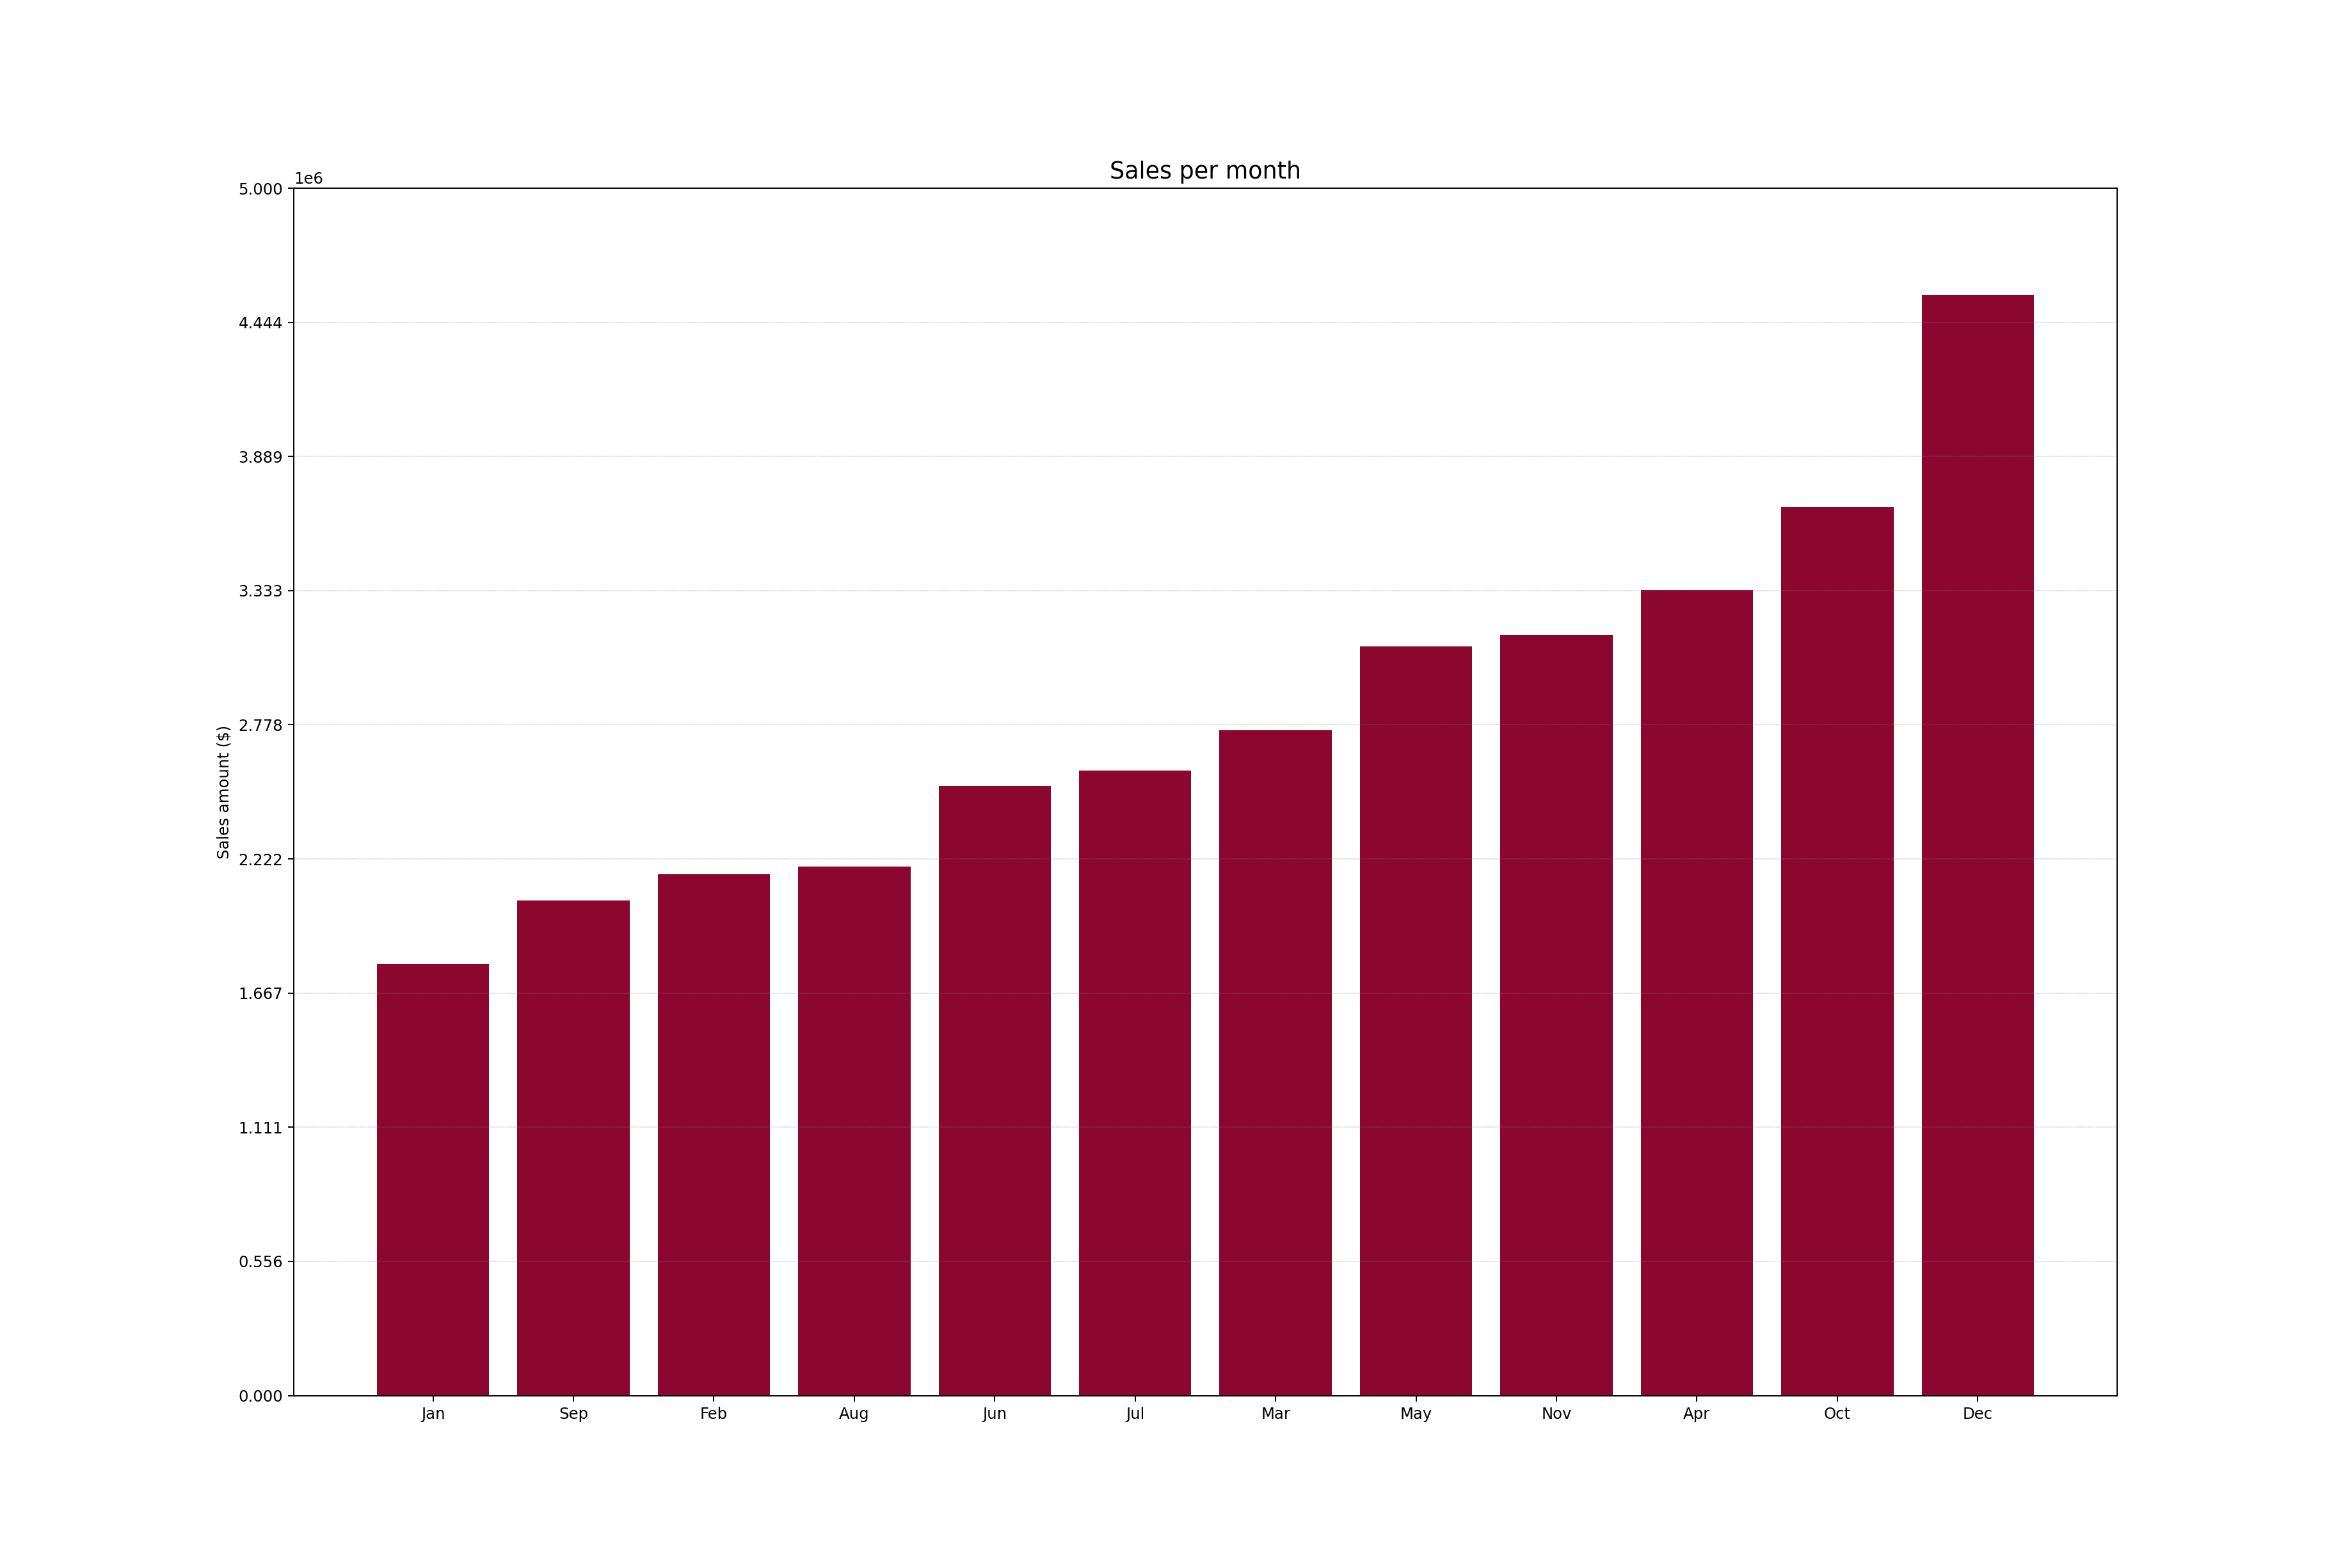

In [34]:
fig, ax=plt.subplots(figsize=(12,8))
ax.bar(monthly_sales.index, monthly_sales.sales, 
       color=['#8B072F'])

#'#FFCB0B', '#8B072F', '#00274C'
ax.set_title('Sales per month', fontdict={'fontsize': 15, 
                                          'fontweight': 'medium'})
ax.set_yticks(np.linspace(0e6,5e6,10))
ax.set_ylabel('Sales amount ($)')
plt.grid(b=True, axis='y',color='gray', linestyle='--', linewidth=0.2)
plt.show()

### Question 2: What city sold the most product?

In [35]:
#add city column
def get_city(address):
    city=address.split(', ')[1]
    state=address.split(', ')[2].split(' ')[0]
    city_state=city + ' ' + '(' + state + ')'
    return city_state
df['city']=df.purchase_address.apply(get_city)

<ipython-input-35-0b87e3a09f00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']=df.purchase_address.apply(get_city)


In [36]:
df.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)


In [37]:
df.city.nunique()

10

In [38]:
df.city.unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [39]:
df.city.value_counts()

San Francisco (CA)    43948
Los Angeles (CA)      29107
New York City (NY)    24456
Boston (MA)           19575
Atlanta (GA)          14616
Dallas (TX)           14571
Seattle (WA)          14487
Portland (OR)          9846
Austin (TX)            9714
Portland (ME)          2415
Name: city, dtype: int64

In [40]:
city_sales=df.groupby('city').sum().sort_values('sales')
city_sales

,quantity_ordered,price_each,sales
city,,,
Portland (ME),2696.0,4.417017e+05,4.441105e+05
Austin (TX),10933.0,1.777232e+06,1.786746e+06
Portland (OR),11110.0,1.822878e+06,1.832539e+06
Seattle (WA),16281.0,2.678871e+06,2.693049e+06
Dallas (TX),16453.0,2.702619e+06,2.717794e+06
Atlanta (GA),16304.0,2.726247e+06,2.741642e+06
Boston (MA),22123.0,3.580075e+06,3.604081e+06
New York City (NY),27470.0,4.553287e+06,4.581659e+06
Los Angeles (CA),32722.0,5.323916e+06,5.354040e+06


In [41]:
city_sales.index

Index(['Portland (ME)', 'Austin (TX)', 'Portland (OR)', 'Seattle (WA)',
       'Dallas (TX)', 'Atlanta (GA)', 'Boston (MA)', 'New York City (NY)',
       'Los Angeles (CA)', 'San Francisco (CA)'],
      dtype='object', name='city')

<IPython.core.display.Javascript object>


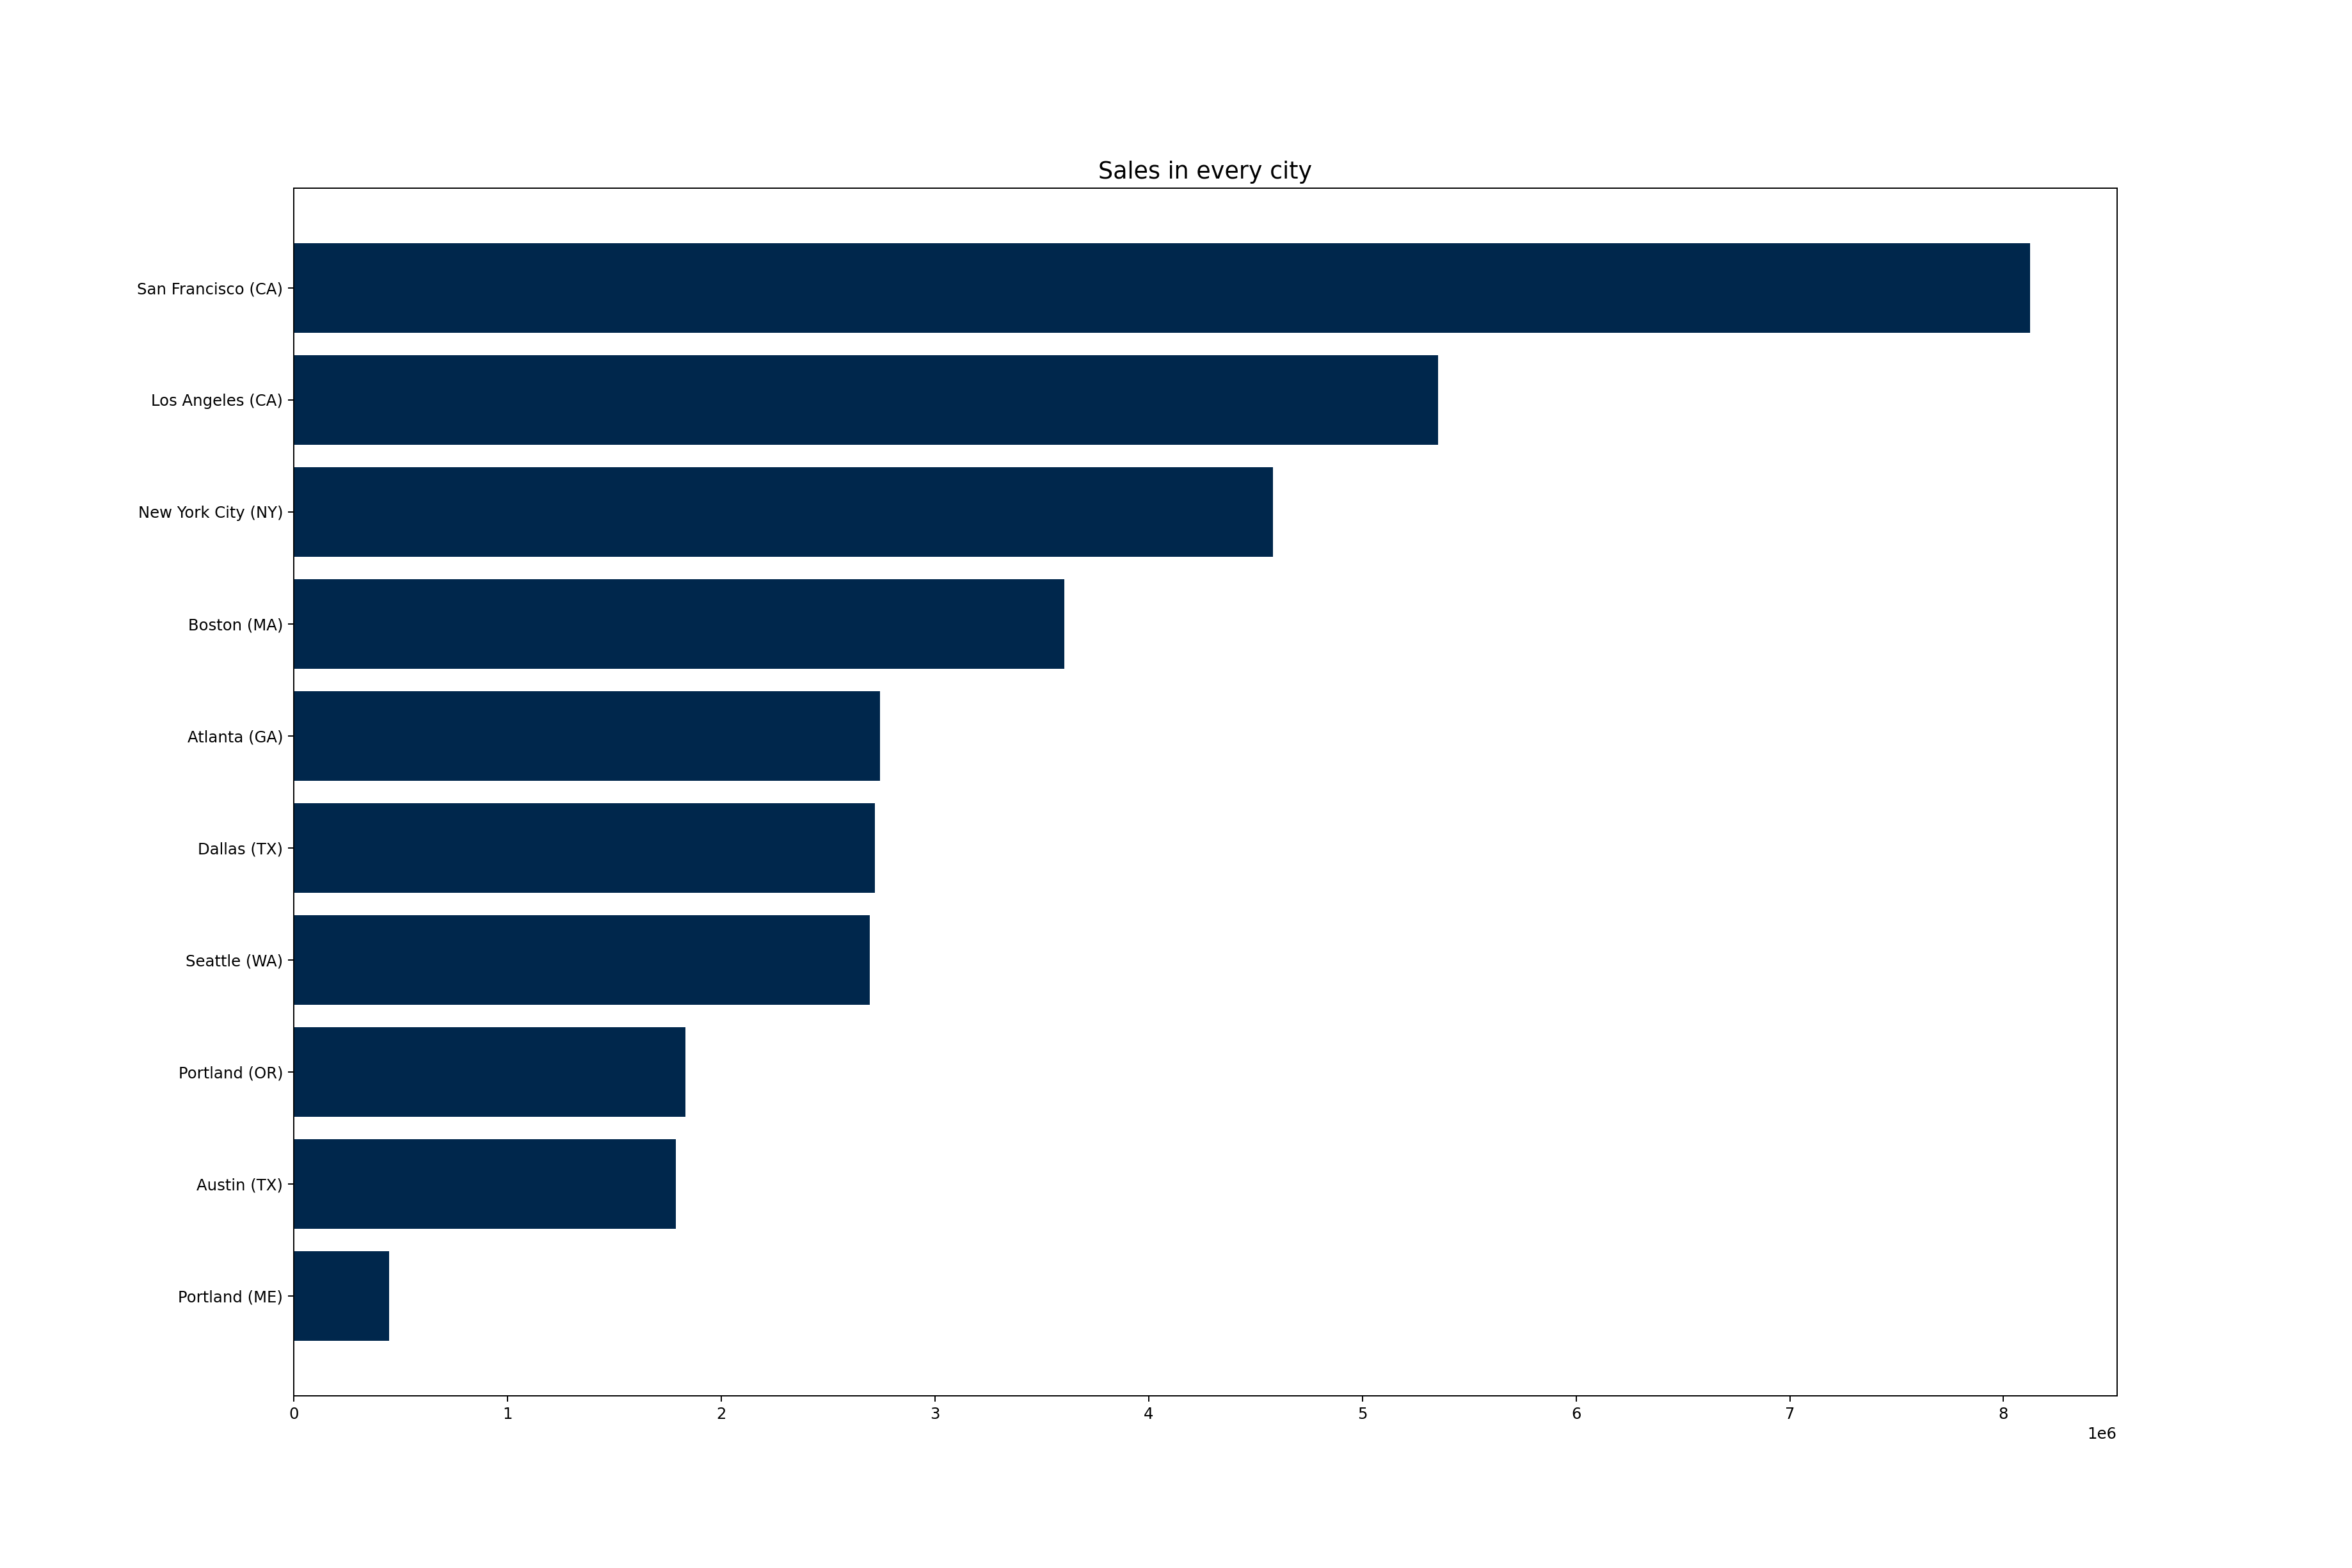

In [42]:
fig, ax=plt.subplots(figsize=(12,8))
ax.barh(city_sales.index, city_sales.sales, 
       color=['#00274C'])

#'#FFCB0B', '#8B072F', '#00274C'
ax.set_title('Sales in every city', fontdict={'fontsize': 15, 
                                          'fontweight': 'medium'})
#ax.set_yticks(city_sales.sales)
#ax.set_ylabel('Sales amount ($)')
#plt.xticks(rotation='vertical')
#plt.savefig('demo1.svg')
#plt.grid(b=True, axis='y',color='gray', linestyle='--', linewidth=0.2)
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [43]:
df.quantity_ordered.dtype

dtype('float64')

In [44]:
quantity_hour=df.groupby(df.order_date.dt.hour).sum()
quantity_hour

,quantity_ordered,price_each,sales
order_date,,,
0,4355.0,694313.78,698694.76
1,2579.0,445316.87,447663.86
2,1379.0,233191.25,234191.08
3,912.0,141948.06,142976.54
4,925.0,160759.69,161350.57
5,1463.0,223261.09,224313.72
6,2767.0,438446.96,441523.14
7,4483.0,730350.33,734595.75
8,6917.0,1175057.60,1181363.76


<IPython.core.display.Javascript object>


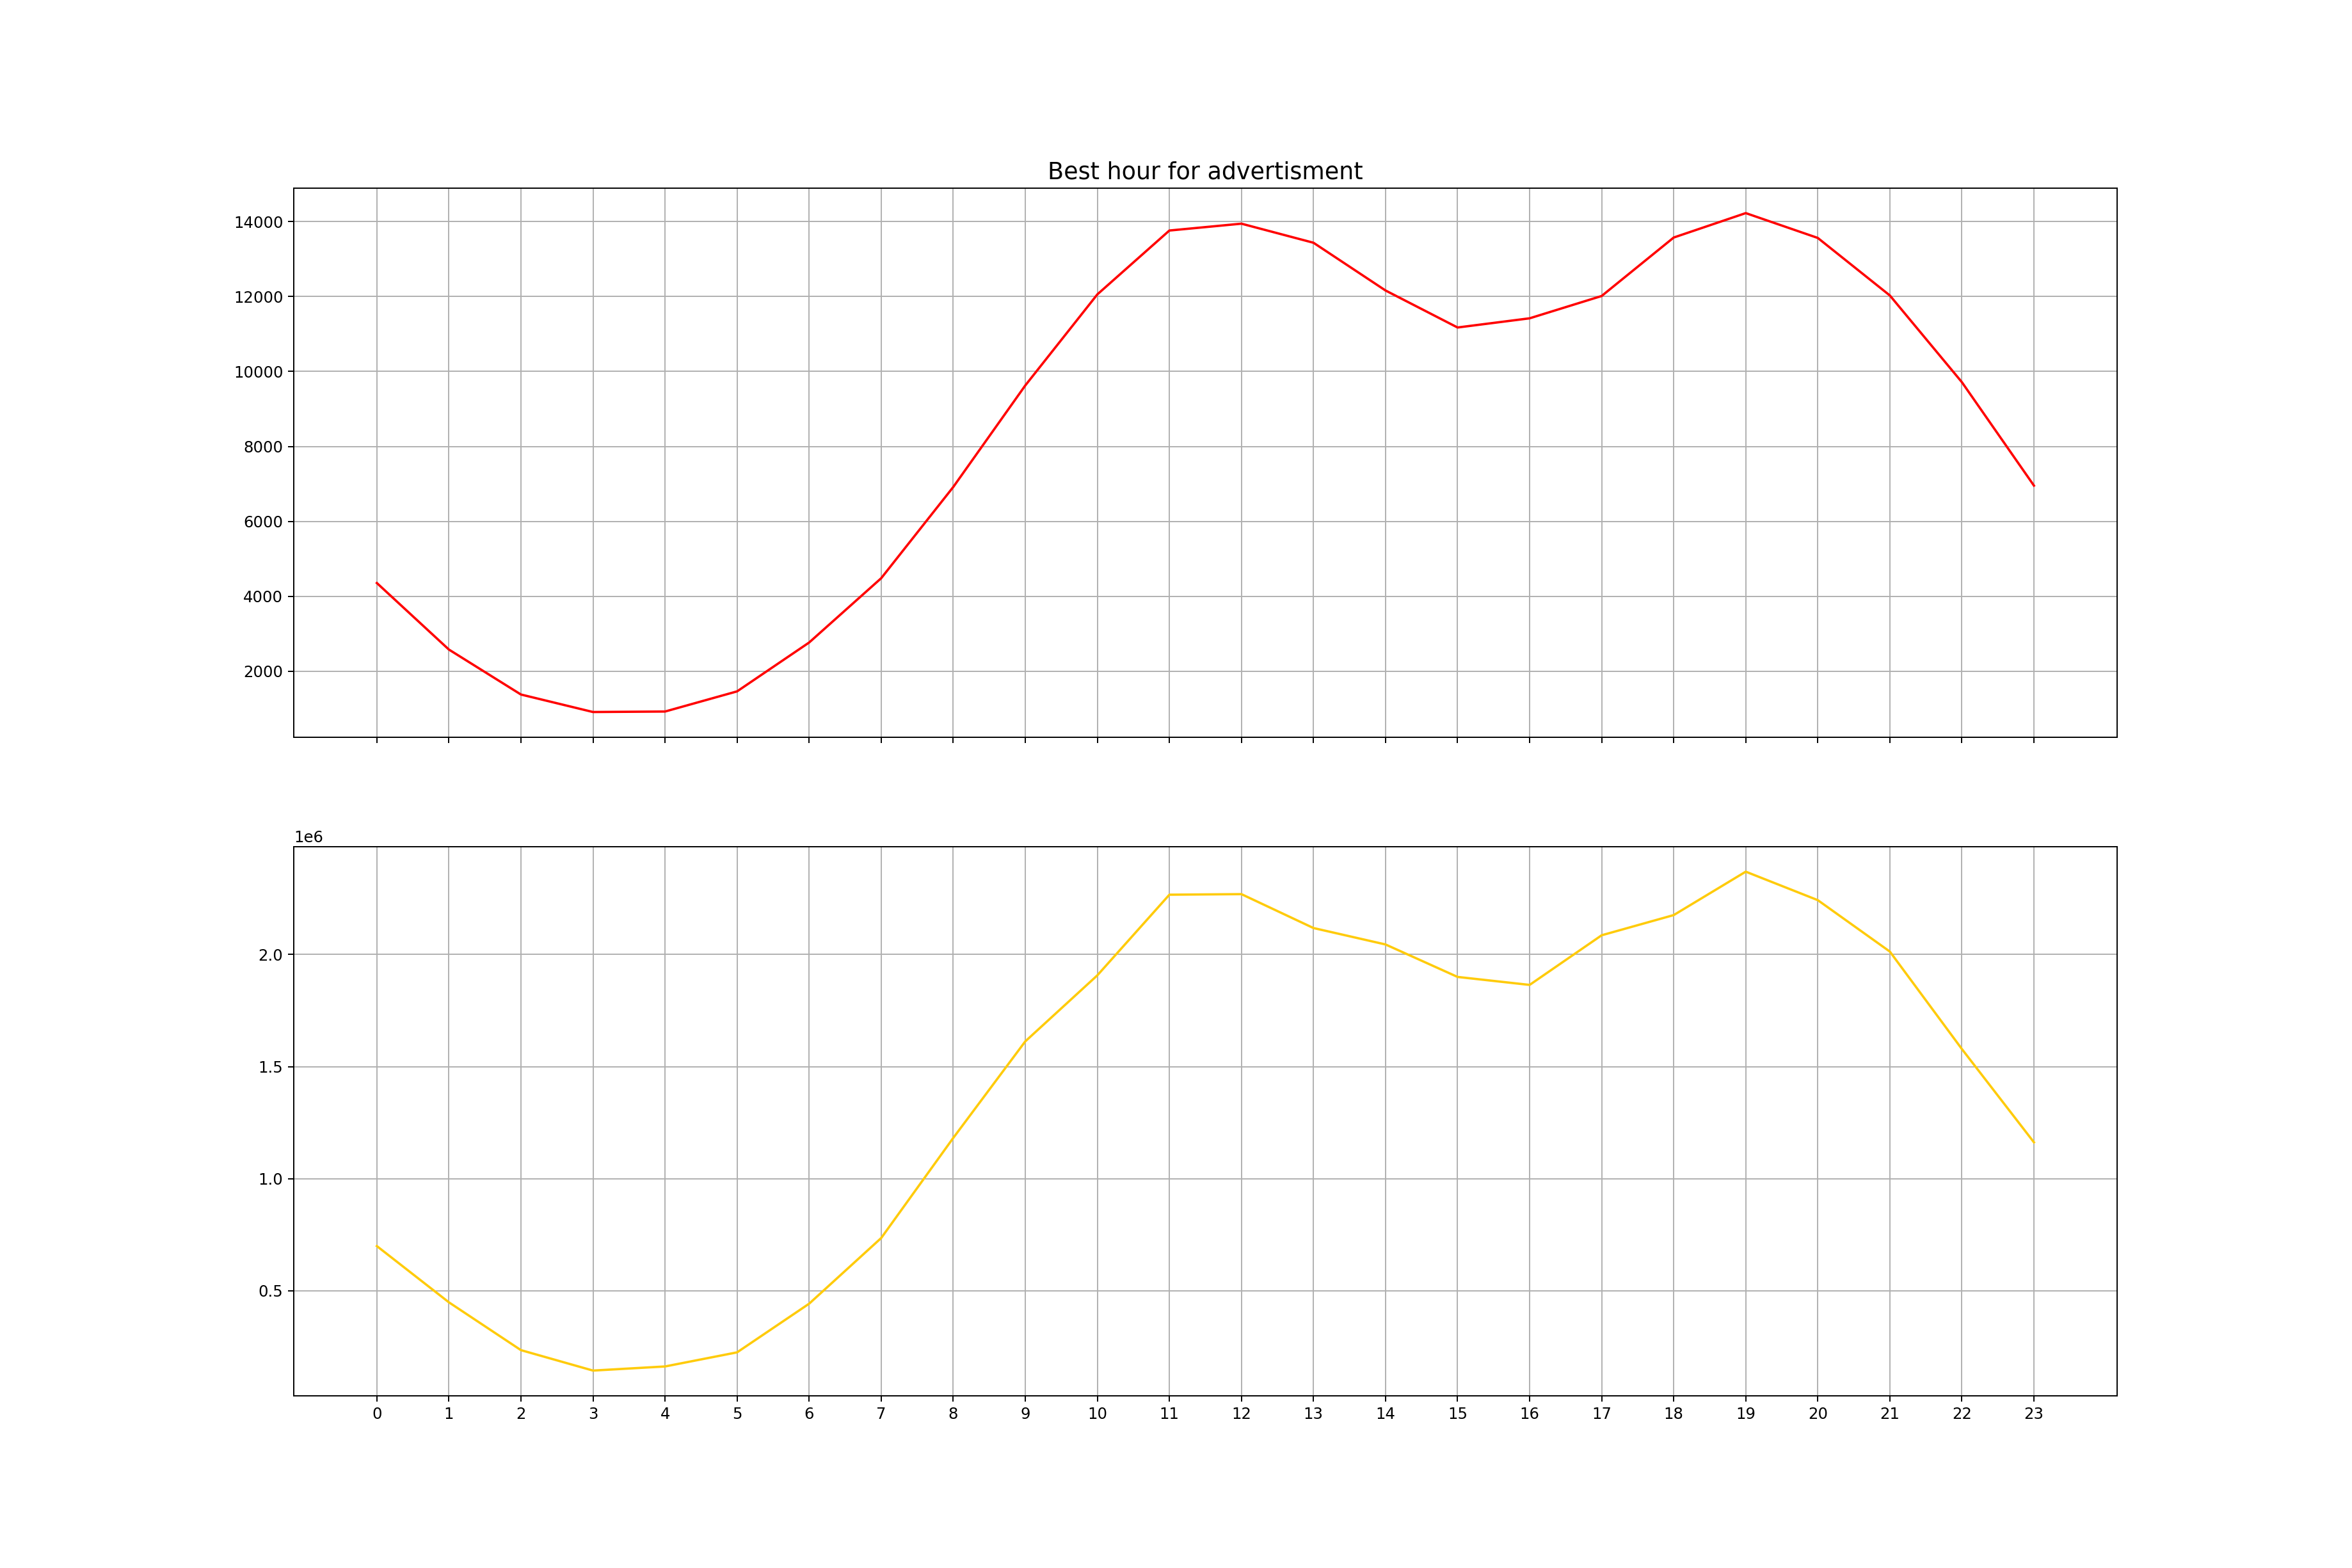

In [45]:
fig, (ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=True)
ax1.plot(quantity_hour.index, quantity_hour.quantity_ordered, color='r')

#'#FFCB0B', '#8B072F', '#00274C'
ax2.plot(quantity_hour.index, quantity_hour.sales, color='#FFCB0B')
ax1.set_title('Best hour for advertisment', fontdict={'fontsize': 15, 
                                          'fontweight': 'medium'})
 
ax2.set_xticks(quantity_hour.index)
ax1.grid()
ax2.grid()
plt.show()

<IPython.core.display.Javascript object>


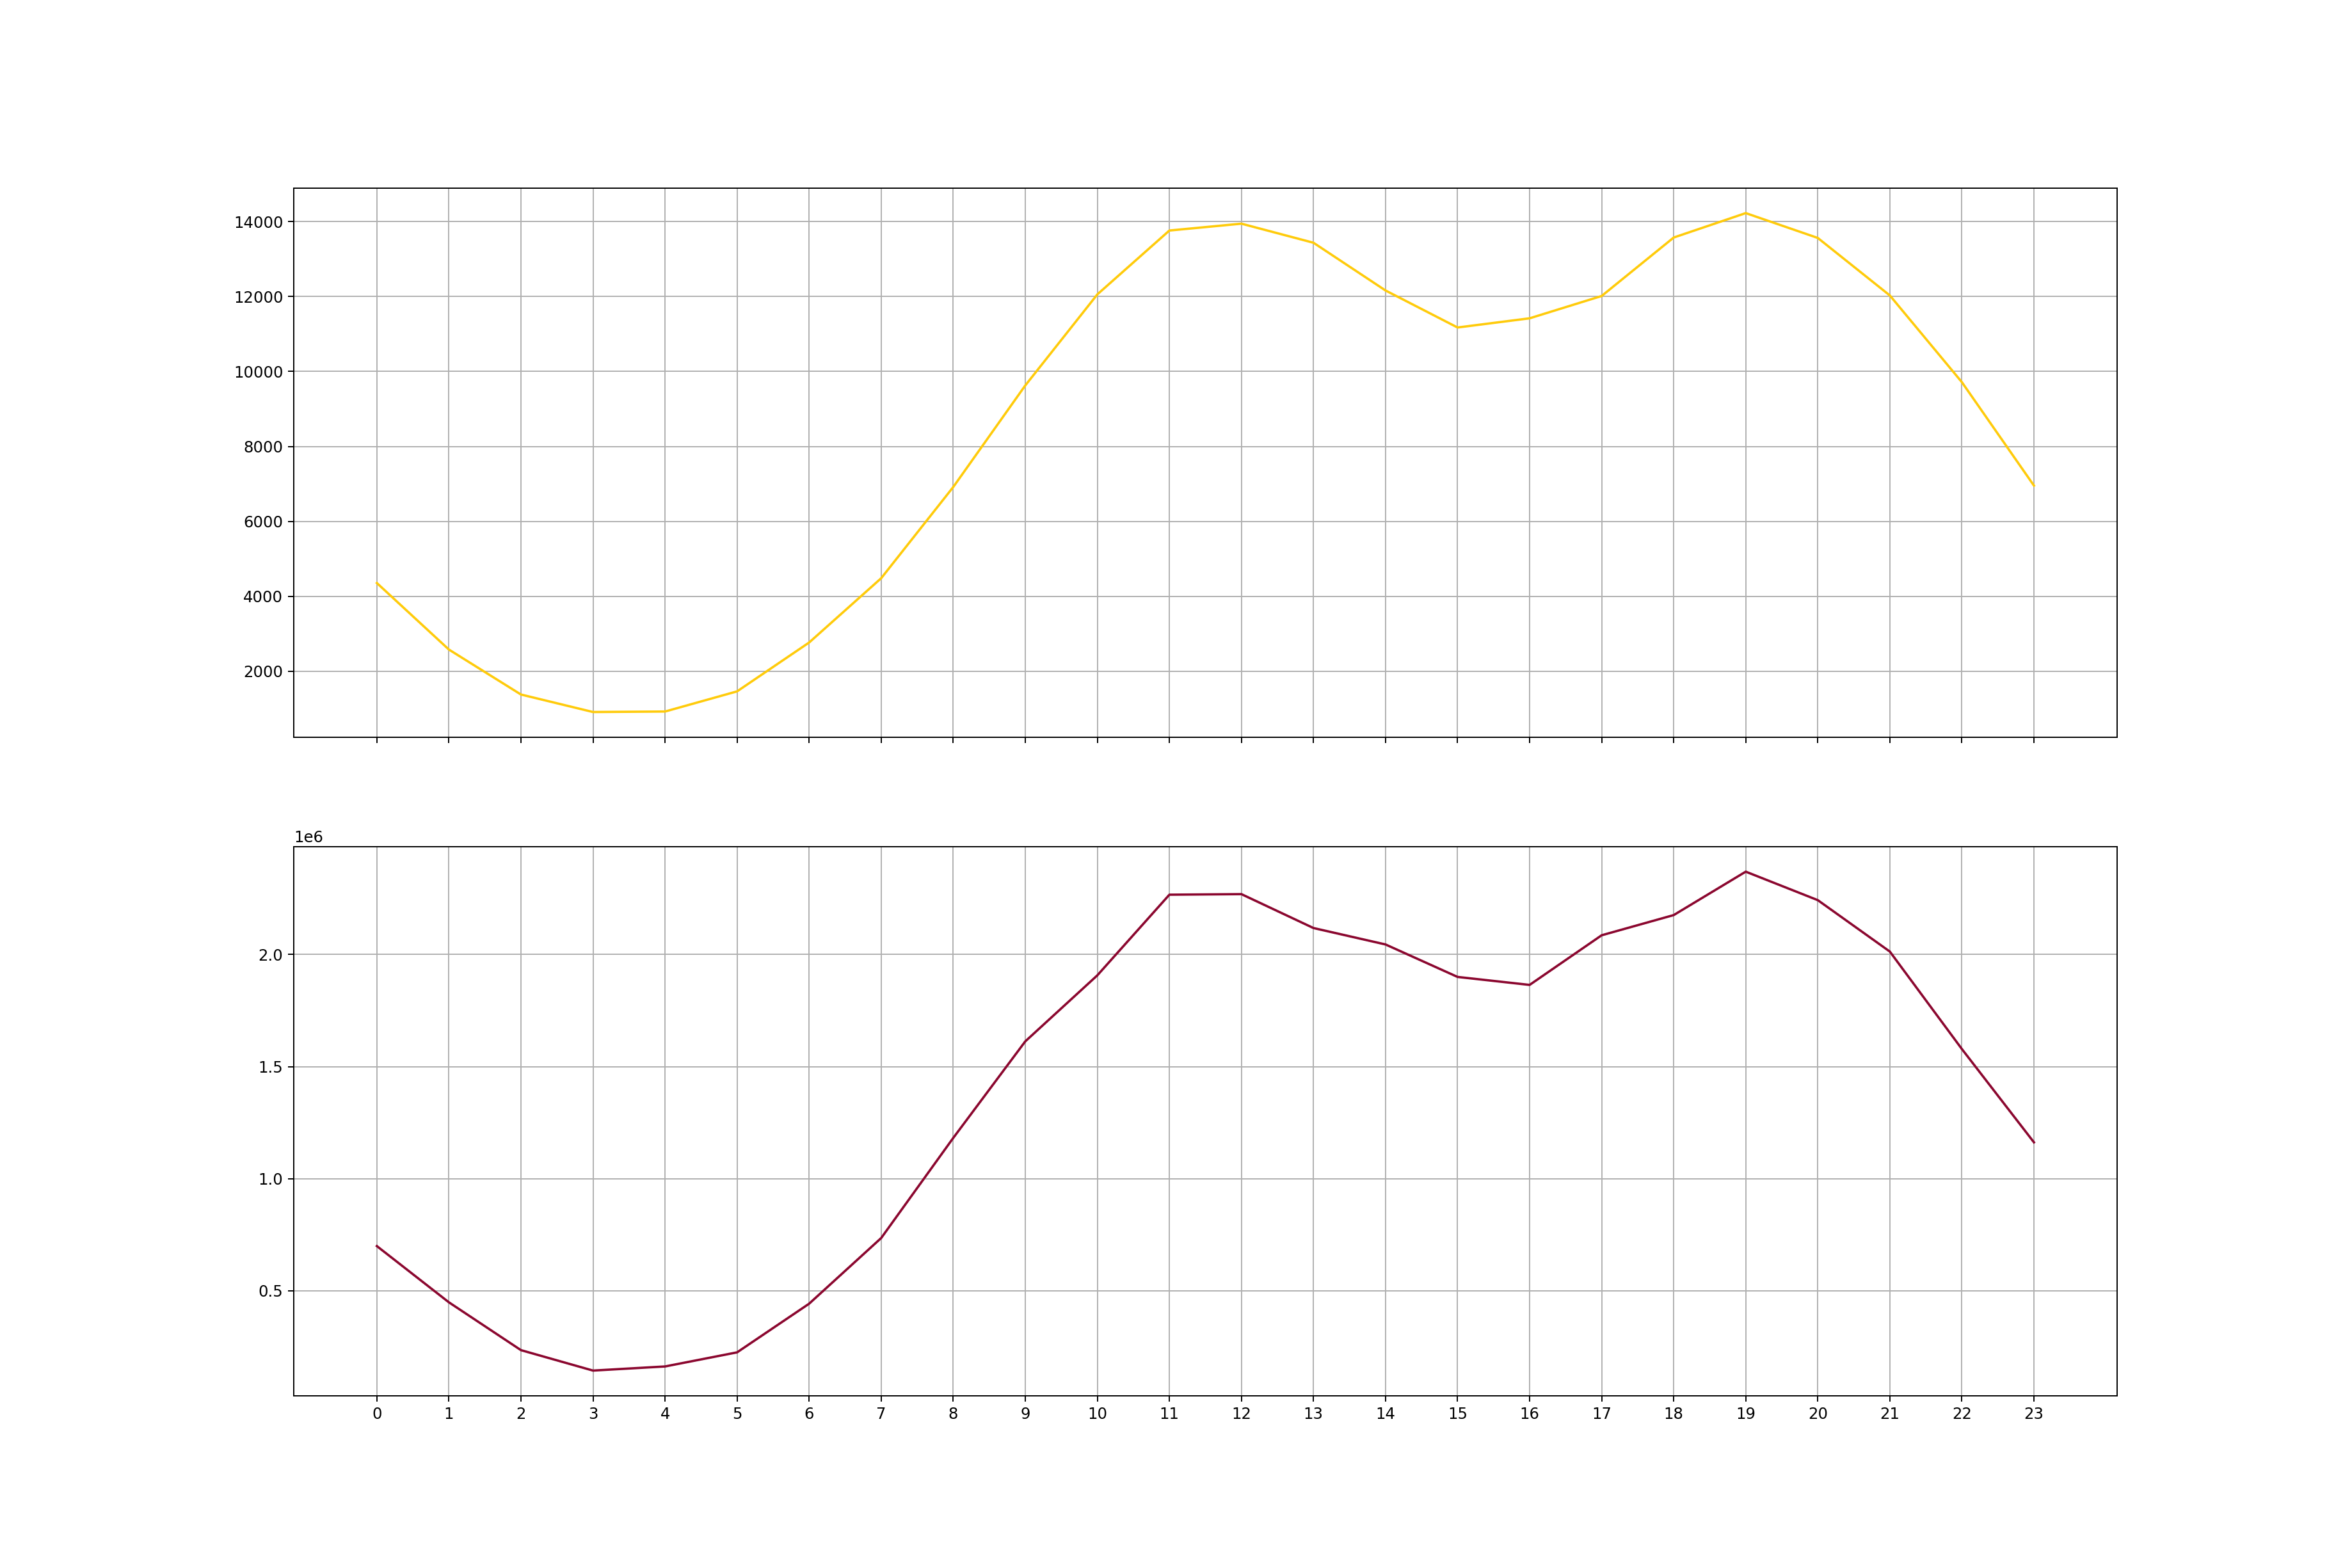

In [46]:
fig, axes=plt.subplots(nrows=2, sharex=True,figsize=(12,8))
x=quantity_hour.index
y1, y2 =quantity_hour.quantity_ordered, quantity_hour.sales
colors=['#FFCB0B', '#8B072F']
for ax, y, color in zip(axes.flat, [y1, y2], colors):
    ax.plot(x, y, color=color)
    ax.set_xticks(x)
    ax.grid()
plt.show()

### What product sold the most? Why do you think it sold the most?

In [47]:
product_quantity=df.groupby(df['product']).sum().sort_values('quantity_ordered')
product_quantity

,quantity_ordered,price_each,sales
product,,,
LG Dryer,640.0,384000.00,384000.00
LG Washing Machine,649.0,389400.00,389400.00
Vareebadd Phone,2023.0,808000.00,809200.00
ThinkPad Laptop,4054.0,4051959.48,4053959.46
20in Monitor,4058.0,443479.68,446339.42
Macbook Pro Laptop,4645.0,7889700.00,7896500.00
Flatscreen TV,4724.0,1411500.00,1417200.00
Google Phone,5440.0,3259800.00,3264000.00
34in Ultrawide Monitor,6076.0,2301979.42,2308819.24


<IPython.core.display.Javascript object>


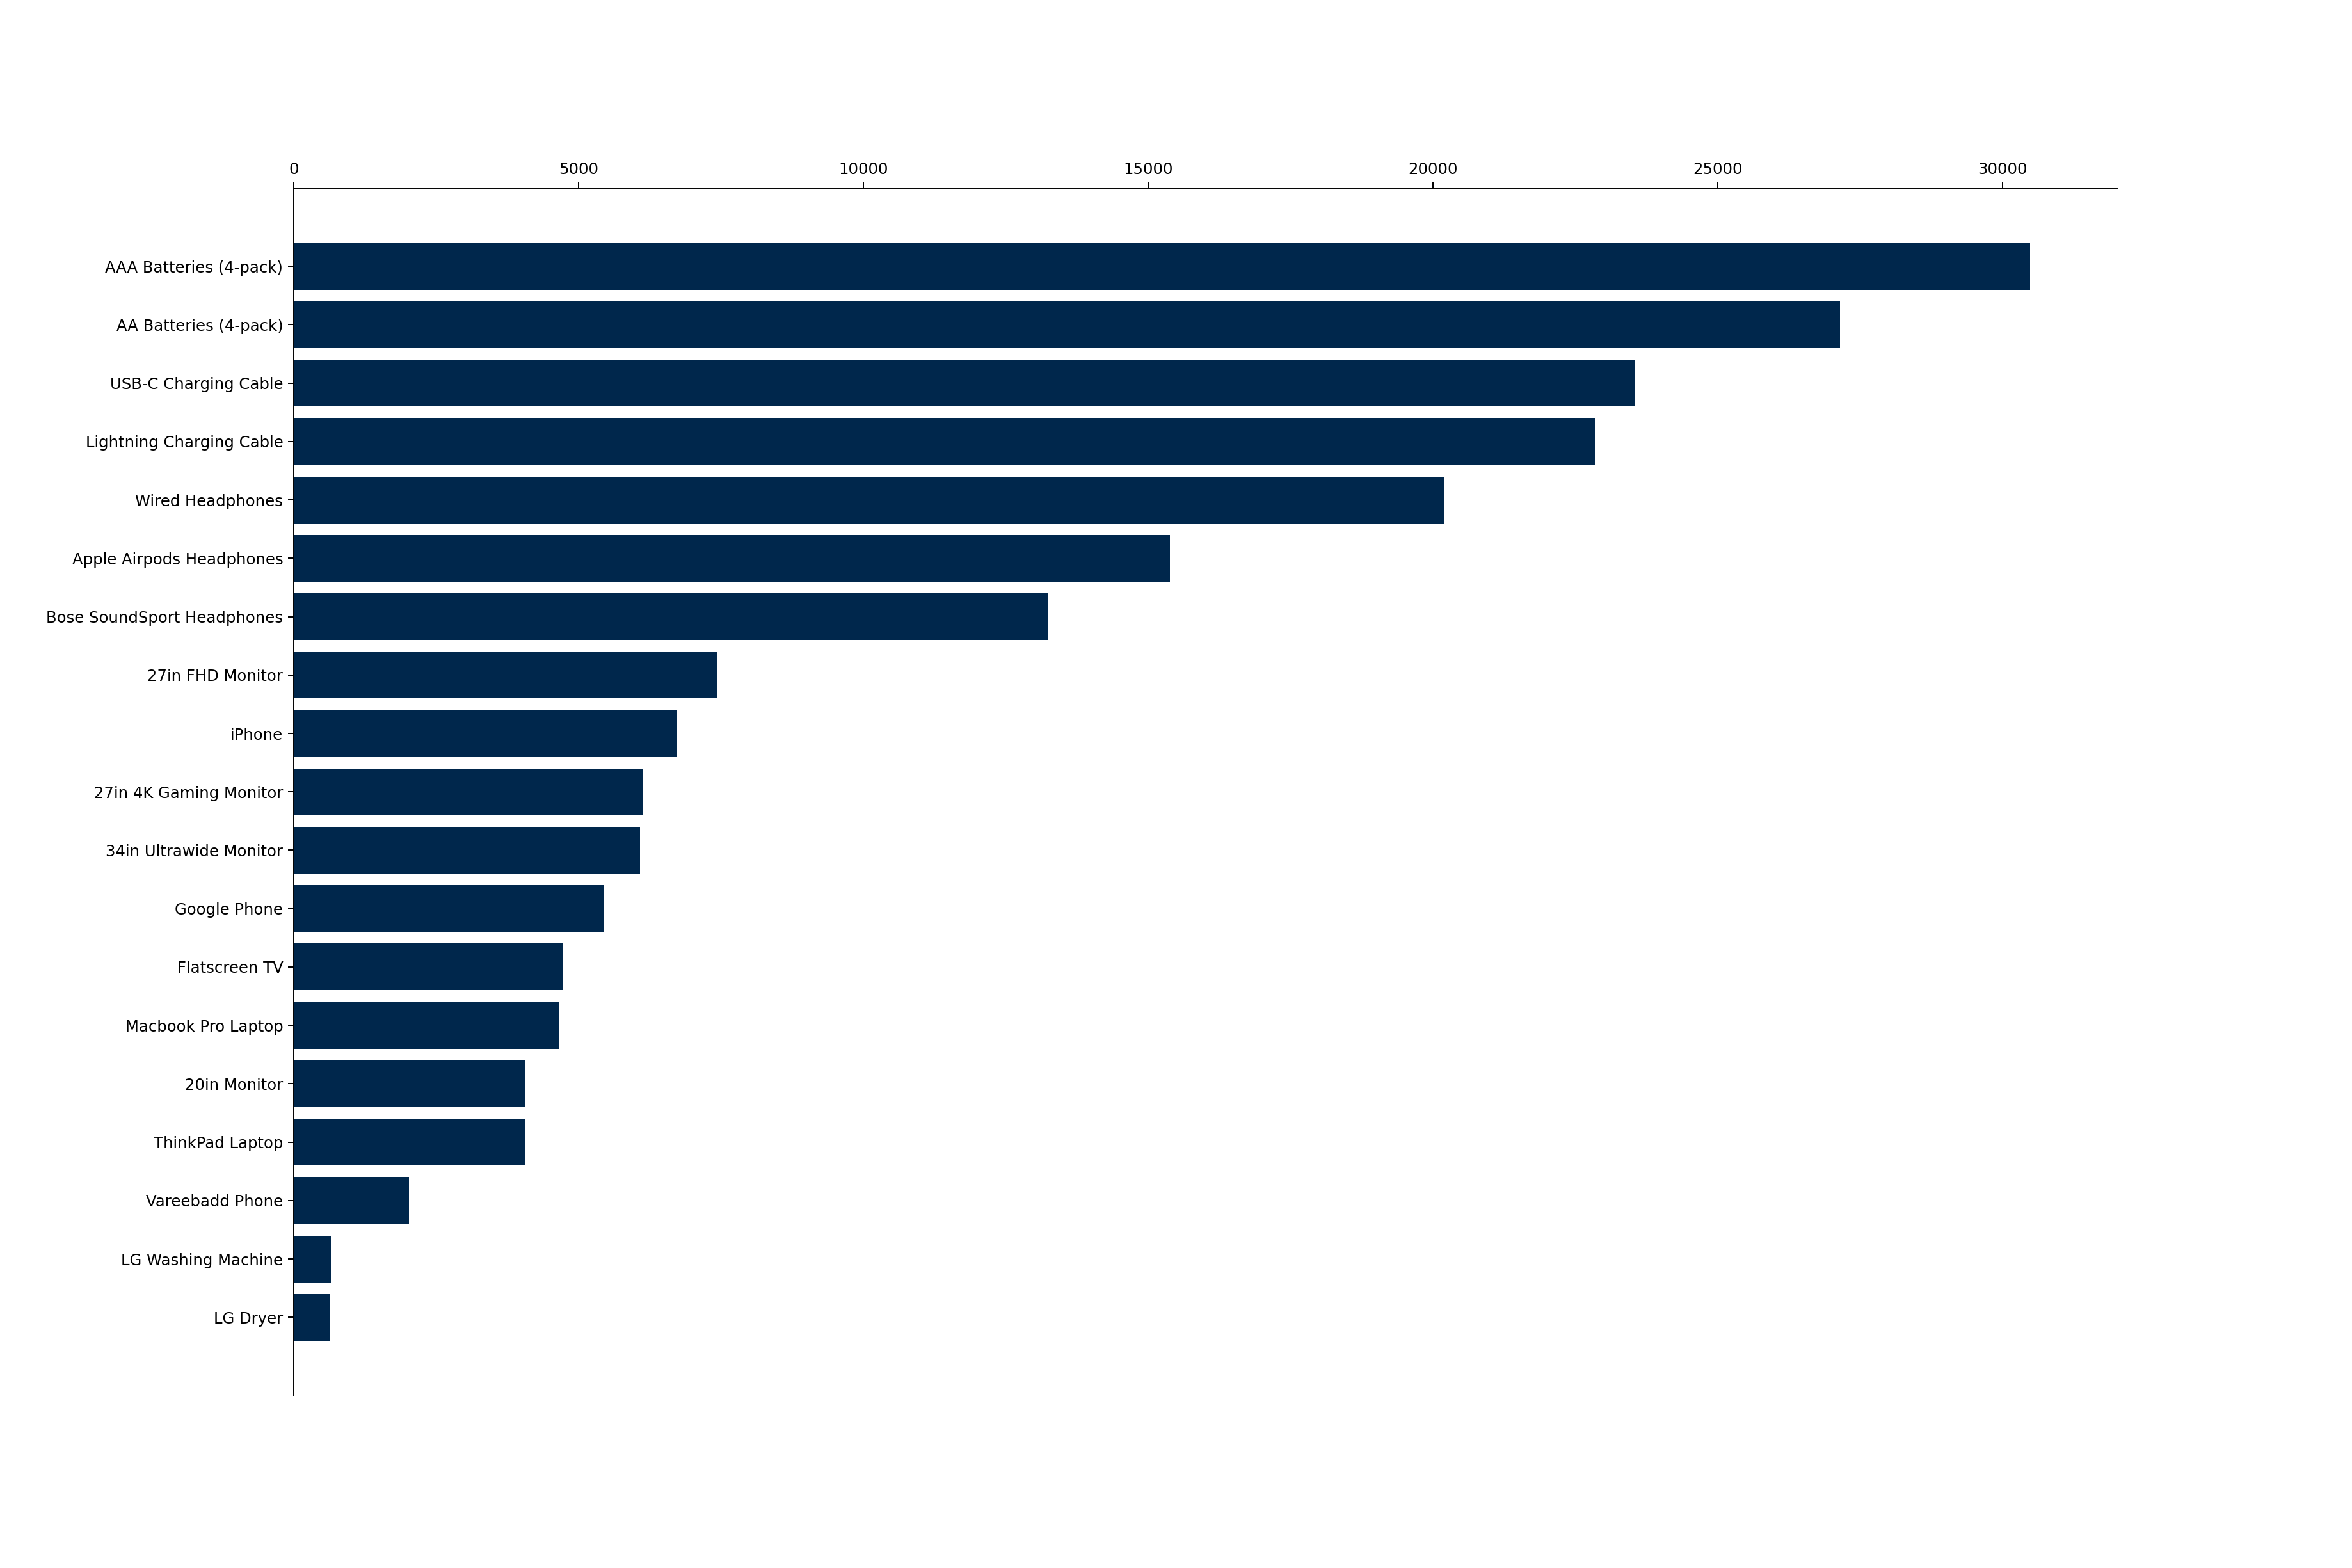

In [48]:
fig, ax=plt.subplots(figsize=(12,8))
ax.barh(product_quantity.index, product_quantity.quantity_ordered, 
       color=['#00274C'])
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('top')
plt.show()
plt.savefig('demo2.png')